In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

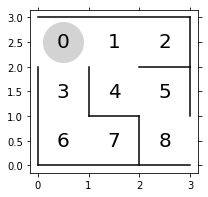

In [2]:
# 迷路の作成
fig = plt.figure(figsize=(3, 3))

# 壁
plt.plot([0, 3], [3, 3], color='k')
plt.plot([0, 3], [0, 0], color='k')
plt.plot([0, 0], [0, 2], color='k')
plt.plot([3, 3], [1, 3], color='k')
plt.plot([1, 1], [1, 2], color='k')
plt.plot([2, 3], [2, 2], color='k')
plt.plot([2, 1], [1, 1], color='k')
plt.plot([2, 2], [0, 1], color='k')

# 数字
for i in range(3):
    for j in range(3):
        plt.text(0.5+i, 2.5-j, str(i+j*3), size=20, ha='center', va='center')

# 円
circle, = plt.plot([0.5], [2.5], marker='o', color='#d3d3d3', markersize=40)

# 目盛りと枠の非表示
plt.tick_params(axis='both', which='both', bottom='off', top= 'off',
        labelbottom='off', right='off', left='off', labelleft='off')
plt.box('off')

In [3]:
# パラメータθの初期値の準備
theta_0 = np.array([
    [np.nan, 1, 1, np.nan], # 0
    [np.nan, 1, 1, 1], # 1
    [np.nan, np.nan, np.nan, 1], # 2
    [1, np.nan, 1, np.nan], # 3
    [1, 1, np.nan, np.nan], # 4
    [np.nan, np.nan, 1, 1], # 5
    [1, 1, np.nan, np.nan], # 6
    [np.nan, np.nan, np.nan, 1]]) # 7

# パラメータθを方策に変換
def get_pi(theta):
    # 割合の計算
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    pi = np.nan_to_num(pi)    
    return pi

# パラメータθの初期値を方策に変換
pi_0 = get_pi(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.5        0.        ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]]


In [4]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0 * 0.01
print(Q)

[[       nan 0.00530455 0.00788432        nan]
 [       nan 0.00844523 0.00582509 0.00480472]
 [       nan        nan        nan 0.009155  ]
 [0.00139046        nan 0.00061597        nan]
 [0.00556453 0.00789996        nan        nan]
 [       nan        nan 0.00743522 0.00864563]
 [0.00212435 0.0053917         nan        nan]
 [       nan        nan        nan 0.00538767]]


In [5]:
# 行動に従って次の状態を取得
def get_s_next(s, a):
    if a == 0: # 上
        return s - 3
    elif a == 1: # 右
        return s + 1
    elif a == 2: # 下
        return s + 3
    elif a == 3: # 左
        return s - 1

In [6]:
def get_a(s, Q, epsilon, pi_0):
    if np.random.rand() < epsilon:
        return np.random.choice([0, 1, 2, 3], p=pi_0[s])
    else:
        return np.nanargmax(Q[s])

In [7]:
def sarsa(s, a, r, s_next, a_next, Q):
    eta = 0.1
    gamma = 0.9
    
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
    return Q

In [8]:
def q_learning(s, a, r, s_next, a_next, Q):
    eta = 0.1
    gamma = 0.9
    
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a])
    return Q

In [9]:
def play(Q, epsilon, pi):
    s = 0
    a_next = get_a(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]
    
    while True:
        a = a_next
        s_next = get_s_next(s, a)
        
        s_a_history[-1][1] = a
        s_a_history.append([s_next, np.nan])
        
        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_a(s_next, Q, epsilon, pi)
            
        Q = sarsa(s, a, r, s_next, a_next, Q)
        
        if s_next == 8:
            break
        else:
            s = s_next
            
            
    return [s_a_history, Q]

In [10]:
epsilon = 0.5

for episode in range(10):
    epsilon = epsilon / 2
    
    [s_a_history, Q] = play(Q, epsilon, pi_0)
    
    print('エピソード: {}, ステップ: {}'.format(
        episode, len(s_a_history)-1))

エピソード: 0, ステップ: 82
エピソード: 1, ステップ: 38
エピソード: 2, ステップ: 6
エピソード: 3, ステップ: 4
エピソード: 4, ステップ: 4
エピソード: 5, ステップ: 4
エピソード: 6, ステップ: 4
エピソード: 7, ステップ: 4
エピソード: 8, ステップ: 4
エピソード: 9, ステップ: 4


In [11]:
# アニメーションの定期処理を行う関数
def animate(i):
    state = s_a_history[i][0]
    circle.set_data((state % 3) + 0.5, 2.5 - int(state / 3))
    return circle

# アニメーションの表示
anim = animation.FuncAnimation(fig, animate, \
        frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())